Task 1: 

In [14]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y

print("Dataset shape:", X.shape)
print("\nFeature names:", diabetes.feature_names)
print("\nFeature descriptions:")
print(diabetes.DESCR)
print("\nBasic statistics:")
print(df.describe())
print("\nTarget variable range:", y.min(), "to", y.max())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Dataset shape: (442, 10)

Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Feature descriptions:
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, p

In [ ]:
Task 2 :

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
baseline_r2 = r2_score(y_test, y_pred)
baseline_mse = mean_squared_error(y_test, y_pred)

print(f"Baseline R² score: {baseline_r2:.4f}")
print(f"Baseline MSE: {baseline_mse:.4f}")
print("\nInitial feature coefficients:")
for name, coef in zip(diabetes.feature_names, lr_model.coef_):
    print(f"{name}: {coef:.4f}")

Baseline R² score: 0.4526
Baseline MSE: 2900.1936

Initial feature coefficients:
age: 37.9040
sex: -241.9644
bmi: 542.4288
bp: 347.7038
s1: -931.4888
s2: 518.0623
s3: 163.4200
s4: 275.3179
s5: 736.1989
s6: 48.6707


In [ ]:
Task 3:

Features: 10, R²: 0.4526, Removed: []
Features: 9, R²: 0.4587, Removed: ['age']
Features: 8, R²: 0.4559, Removed: ['age', 's6']
Features: 7, R²: 0.4583, Removed: ['age', 's3', 's6']
Features: 6, R²: 0.4628, Removed: ['age', 's3', 's4', 's6']
Features: 5, R²: 0.4382, Removed: ['age', 'sex', 's3', 's4', 's6']
Features: 4, R²: 0.4464, Removed: ['age', 'sex', 'bp', 's3', 's4', 's6']
Features: 3, R²: 0.4451, Removed: ['age', 'sex', 'bp', 's2', 's3', 's4', 's6']
Features: 2, R²: 0.4523, Removed: ['age', 'sex', 'bp', 's1', 's2', 's3', 's4', 's6']
Features: 1, R²: 0.2334, Removed: ['age', 'sex', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


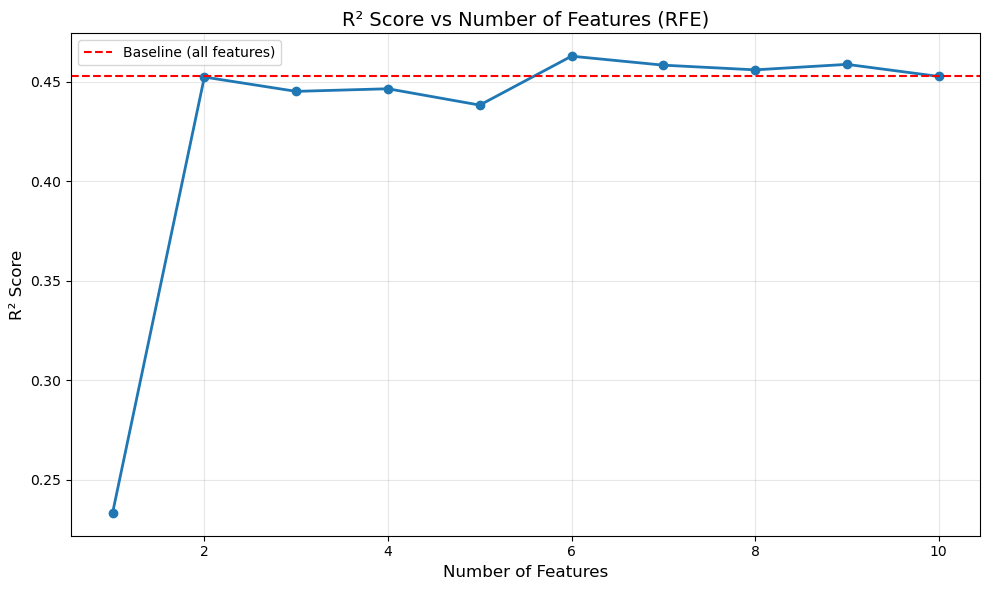

In [8]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

n_features = X_train.shape[1]
results = {
    'n_features': [],
    'r2_score': [],
    'features_remaining': [],
    'coefficients': []
}

for n in range(n_features, 0, -1):
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=n)
    rfe.fit(X_train, y_train)
    
    X_train_rfe = rfe.transform(X_train)
    X_test_rfe = rfe.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_rfe, y_train)
    
    y_pred = model.predict(X_test_rfe)
    r2 = r2_score(y_test, y_pred)
    
    results['n_features'].append(n)
    results['r2_score'].append(r2)
    results['features_remaining'].append(
        [diabetes.feature_names[i] for i, selected in enumerate(rfe.support_) if selected]
    )
    
    coefs = np.zeros(n_features)
    coefs[rfe.support_] = model.coef_
    results['coefficients'].append(coefs)
    
    print(f"Features: {n}, R²: {r2:.4f}, Removed: {[diabetes.feature_names[i] for i, selected in enumerate(rfe.support_) if not selected]}")

plt.figure(figsize=(10, 6))
plt.plot(results['n_features'], results['r2_score'], marker='o', linewidth=2)
plt.xlabel('Number of Features', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('R² Score vs Number of Features (RFE)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=baseline_r2, color='r', linestyle='--', label='Baseline (all features)')
plt.legend()
plt.tight_layout()
plt.savefig('r2_vs_features.png', dpi=300)
plt.show()

In [15]:
threshold = 0.01
optimal_n = n_features

for i in range(len(results['r2_score']) - 1):
    r2_diff = results['r2_score'][i] - results['r2_score'][i + 1]
    if r2_diff > threshold:
        optimal_n = results['n_features'][i]
        break

print(f"\nOptimal number of features: {optimal_n}")
print(f"R² at optimal: {results['r2_score'][results['n_features'].index(optimal_n)]:.4f}")
print(f"R² loss from baseline: {baseline_r2 - results['r2_score'][results['n_features'].index(optimal_n)]:.4f}")


Optimal number of features: 6
R² at optimal: 0.4628
R² loss from baseline: -0.0102


In [ ]:
Task 4:


Coefficient Evolution:
                age       sex       bmi        bp        s1        s2  \
Iteration 0  37.904 -241.9644  542.4288  347.7038 -931.4888  518.0623   
Iteration 1   0.000 -236.6496  542.7995  354.2114 -936.3506  528.7966   
Iteration 2   0.000 -233.7547  550.7444  363.7918 -947.8231  541.5858   
Iteration 3   0.000 -235.3642  551.8664  362.3561 -660.6432  343.3481   
Iteration 4   0.000 -215.2674  557.3142  350.1787 -851.5157  591.0933   
Iteration 5   0.000    0.0000  597.8927  306.6479 -655.5606  409.6222   
Iteration 6   0.000    0.0000  691.4601    0.0000 -592.9779  362.9503   
Iteration 7   0.000    0.0000  737.6856    0.0000 -228.3399    0.0000   
Iteration 8   0.000    0.0000  732.1090    0.0000    0.0000    0.0000   
Iteration 9   0.000    0.0000  998.5777    0.0000    0.0000    0.0000   

                   s3        s4        s5       s6  
Iteration 0  163.4200  275.3179  736.1989  48.6707  
Iteration 1  167.8004  270.3965  744.4474  53.3505  
Iteration 2  

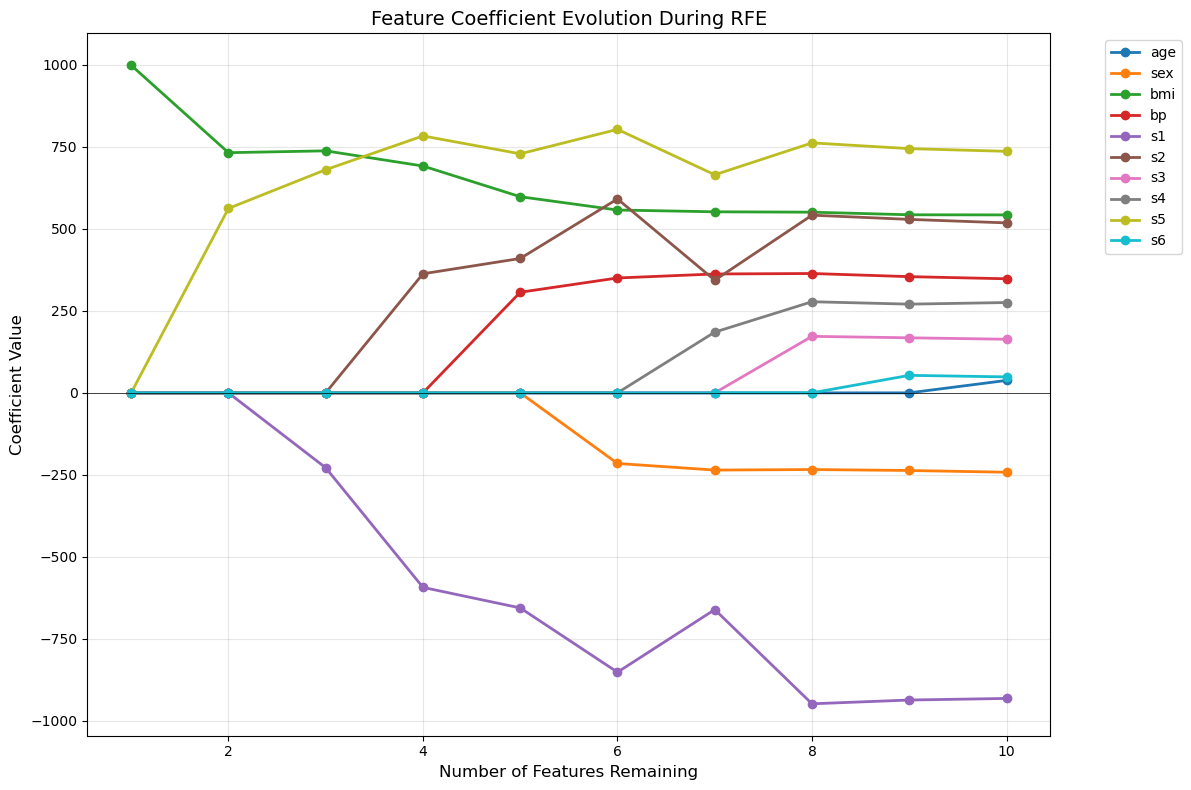

In [22]:
coef_df = pd.DataFrame(
    results['coefficients'],
    columns=diabetes.feature_names,
    index=[f"Iteration {i}" for i in range(len(results['coefficients']))]
)

print("\nCoefficient Evolution:")
print(coef_df.round(4))

plt.figure(figsize=(12, 8))
for i, feature in enumerate(diabetes.feature_names):
    plt.plot(range(n_features, 0, -1), 
             [coefs[i] for coefs in results['coefficients']],
             marker='o', label=feature, linewidth=2)

plt.xlabel('Number of Features Remaining', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.title('Feature Coefficient Evolution During RFE', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('coefficient_paths.png', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
for i, coefs in enumerate(results['coefficients']):
    non_zero = sum(1 for c in coefs if c != 0)
    if non_zero == 3:
        final_coefs = coefs
        iteration_with_3 = i
        break

feature_importance = [(diabetes.feature_names[i], abs(final_coefs[i])) 
                      for i in range(len(final_coefs)) if final_coefs[i] != 0]
feature_importance.sort(key=lambda x: x[1], reverse=True)

print(f"\nTop 3 Most Important Features (at iteration {iteration_with_3}):")
for i, (feature, importance) in enumerate(feature_importance, 1):
    print(f"{i}. {feature}: coefficient = {importance:.4f}")


Top 3 Most Important Features (at iteration 7):
1. bmi: coefficient = 737.6856
2. s5: coefficient = 680.2247
3. s1: coefficient = 228.3399
